In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import array
from scipy.stats import mode
from scipy.interpolate import interp1d

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Input, Dropout, Flatten, BatchNormalization
from keras.layers import concatenate, Dropout
from keras.utils import to_categorical
from keras import optimizers
import seaborn as sns

In [2]:
df=pd.read_csv('pamap2.csv', index_col=0)

In [3]:
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.0,0.0,0.0,0.0,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,1


In [4]:
df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [5]:
df = df.drop(df[df['activityID'] == 12].index)
df = df.drop(df[df['activityID'] == 13].index)

In [6]:
print(df['activityID'].value_counts())

activityID
4    20998
1    17575
3    17256
2    16881
7    16857
5     8665
Name: count, dtype: int64


In [7]:
# 'hand'와 'chest'와 관련된 열 이름
hand_columns = ['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'activityID']
chest_columns = ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'activityID']

# 'hand'와 'chest' 열을 선택하여 새로운 데이터프레임 생성
h_feature= df[hand_columns]
c_feature = df[chest_columns]

# 새로운 데이터프레임 출력
print("Feature Hand:")
h_feature

Feature Hand:


,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,activityID
2932,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857,1
2943,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508,1
2954,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481,1
2965,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997,1
2976,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342,5
2818413,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393,5
2818423,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335,5
2818435,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349,5


In [8]:
c_feature

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,activityID
2932,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280,1
2943,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950,1
2954,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650,1
2965,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430,1
2976,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800,5
2818413,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339,5
2818423,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380,5
2818435,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572,5


In [9]:
from sklearn.preprocessing import StandardScaler

h_X = h_feature[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']]
h_y= h_feature['activityID']

scaler = StandardScaler()
h_X = scaler.fit_transform(h_X)

scaled_h_X = pd.DataFrame(data = h_X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3'])
scaled_h_X['label'] = h_y.values

In [10]:
c_X = c_feature[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3']]
c_y= c_feature['activityID']

scaler = StandardScaler()
c_X = scaler.fit_transform(c_X)

scaled_c_X = pd.DataFrame(data = c_X, columns = ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'])
scaled_c_X['label'] = c_y.values

In [11]:
h_train_set=scaled_h_X
h_test_set=scaled_h_X["label"]
c_train_set=scaled_c_X
c_test_set=scaled_c_X["label"]

In [12]:
from sklearn.model_selection import train_test_split

h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(h_train_set, 
                                                    h_test_set,
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [13]:
c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(c_train_set, 
                                                    c_test_set,
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [14]:
#TIME_STEPS : The length of the time segment.
#STEP : Determines the amount of overlap between two consecutive time segments.
    
    
TIME_STEPS = 40
STEP = 10

In [15]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [16]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

h_X_train, h_y_train = create_dataset(h_X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3'
    ]], h_X_train.label, TIME_STEPS, STEP)
h_X_test, h_y_test = create_dataset(h_X_test[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3'
    ]], h_X_test.label, TIME_STEPS, STEP)

print(h_X_train.shape, h_y_train.shape)

C:\Users\khw\AppData\Local\Temp\ipykernel_2332\229725574.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


C:\Users\khw\AppData\Local\Temp\ipykernel_2332\229725574.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(73673, 1, 12) (73673, 1)


In [17]:
c_X_train, c_y_train = create_dataset(c_X_train[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'
    ]], c_X_train.label, TIME_STEPS, STEP)
c_X_test, c_y_test = create_dataset(c_X_test[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'
    ]], c_X_test.label, TIME_STEPS, STEP)

print(c_X_train.shape, c_y_train.shape)

C:\Users\khw\AppData\Local\Temp\ipykernel_2332\229725574.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\khw\AppData\Local\Temp\ipykernel_2332\229725574.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(

(73673, 1, 12) (73673, 1)


In [18]:
print("hand")
print("X_train.shape: ", h_X_train.shape)
print("X_test.shape ", h_X_test.shape)
print("y_train.shape ", h_y_train.shape)
print("y_test.shape ", h_y_test.shape)

hand
X_train.shape:  (73673, 1, 12)
X_test.shape  (24557, 1, 12)
y_train.shape  (73673, 1)
y_test.shape  (24557, 1)


In [19]:
print("chest")
print("X_train.shape: ", c_X_train.shape)
print("X_test.shape ", c_X_test.shape)
print("y_train.shape ", c_y_train.shape)
print("y_test.shape ", c_y_test.shape)

chest
X_train.shape:  (73673, 1, 12)
X_test.shape  (24557, 1, 12)
y_train.shape  (73673, 1)
y_test.shape  (24557, 1)


In [20]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=c_X_train.shape[1],c_X_train.shape[2],c_y_train.shape[1]

In [21]:
n_timesteps, n_features, n_outputs

(1, 12, 1)

In [22]:
model = Sequential()
model.add(LSTM(64,input_shape = [n_timesteps, n_features], return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])


In [23]:
history = model.fit(c_X_train, c_y_train, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10


c:\Users\khw\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2073/2073 [==============================] - 18s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 2/10
2073/2073 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 3/10
2073/2073 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 4/10
2073/2073 [==============================] - 14s 7ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 5/10
2073/2073 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 6/10
2073/2073 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 7/10
2073/2073 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - acc: 0.1802 - val_loss: 0.0000e+00 - val_acc: 0.1775
Epoch 8/10

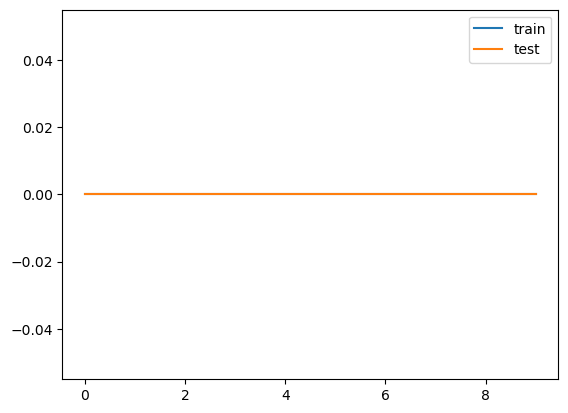

In [24]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [25]:
model.evaluate(c_X_test, c_y_test)
y_pred = model.predict(c_X_test)

768/768 [==============================] - 3s 3ms/step


In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(c_y_test,axis=1)
Y_pred = np.argmax(model.predict(c_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

768/768 [==============================] - 2s 3ms/step
Confusion Matrix
[[24557]]


In [27]:
new_model = keras.models.Sequential(model.layers[:-1])

model.trainable = False
new_model.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history2 = new_model.fit(h_X_train, h_y_train, epochs=3, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

new_model = keras.models.Sequential(model.layers[:-1])
model.trainable = True
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(1, activation="sigmoid"))
new_model.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history2 = new_model.fit(h_X_train, h_y_train, epochs=10)

Epoch 1/3
2073/2073 [==============================] - 13s 4ms/step - loss: 22.5217 - accuracy: 0.0206 - val_loss: -9.7529 - val_accuracy: 0.0000e+00
Epoch 2/3
2073/2073 [==============================] - 8s 4ms/step - loss: 22.5171 - accuracy: 0.0219 - val_loss: -9.7529 - val_accuracy: 0.0000e+00
Epoch 3/3
2073/2073 [==============================] - 7s 4ms/step - loss: 22.5809 - accuracy: 0.0215 - val_loss: -9.7529 - val_accuracy: 0.0000e+00
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 d

Epoch 1/10
2303/2303 [==============================] - 19s 6ms/step - loss: nan - accuracy: 0.0157
Epoch 2/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
2303/2303 [==============================] - 14s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
2303/2303 [==============================] - 14s 6ms/ste

In [28]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm,True
1,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_1,True
2,<keras.src.layers.regularization.dropout.Dropo...,dropout,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_1,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_1,True


In [29]:
history2 = new_model.fit(h_X_train, h_y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
   1/2073 [..............................] - ETA: 28s - loss: nan - accuracy: 0.0000e+00

2073/2073 [==============================] - 15s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
2073/2073 [==============================] - 14s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_acc

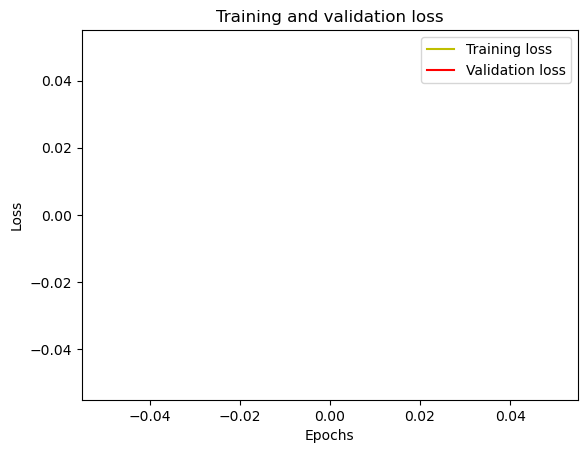

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

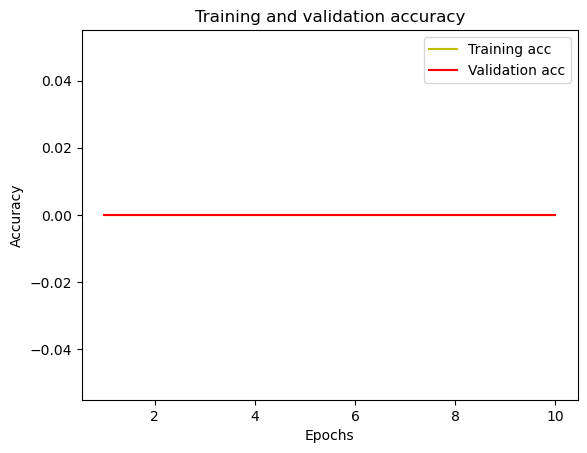

In [31]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
new_model.evaluate(h_X_test, h_y_test)
y_pred = new_model.predict(h_X_test)

768/768 [==============================] - 3s 3ms/step
